In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
import re
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from multiprocessing import Process

In [7]:
user_agent = "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36"
headers = {'User-Agent': user_agent}

In [13]:
def title(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_title_tags = b1.findAll('a', attrs={'class':'a-link-normal s-access-detail-page a-text-normal'})
        ds_title_strings = map(lambda item: item.text , ds_pg_one_title_tags)
        title_pattern = re.compile(".+")
        data_science_titles = map(lambda item: re.search(title_pattern, item).group(0), ds_title_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_title_tags = b2.findAll('a', attrs={'class':'a-link-normal s-access-detail-page a-text-normal'})
        ds_title_strings_two = map(lambda item: item.text , ds_pg_two_title_tags)
        title_pattern = re.compile(".+")
        data_science_titles_two = map(lambda item: re.search(title_pattern, item).group(0), ds_title_strings_two)
        data_science_book_titles_one_and_two = np.concatenate((data_science_titles, data_science_titles_two))
        ds_titles_df = pd.DataFrame(data_science_book_titles_one_and_two)
        ds_titles_df.columns = ['Data_Science_Book_Titles']
        return ds_titles_df
    else:
        print ('You Lose')

In [14]:
title('data science')

,Data_Science_Book_Titles
0,Data Science from Scratch: First Principles wi...
1,Data Science for Business: What You Need to Kn...
2,What Is Data Science?
3,Data Science For Dummies
4,Data Analytics : The Complete Beginner's Guide...
5,Naked Statistics: Stripping the Dread from the...
6,Doing Data Science: Straight Talk from the Fro...
7,Data Smart: Using Data Science to Transform In...
8,Python Machine Learning
9,Data Driven


In [65]:
# 
class Book:
    def __init__(self, title, url):
        self.title = title
        self.url = url
        
#class BookReferenceFinder answers a collection of references to books in a given category
class BookReferenceFinder:
    def __init__(self, category):
        self.category = category

    def rootUrl(self):
        return 'https://www.amazon.com'
    
    def url(self):
        return self.rootUrl()+'/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords='+(self.category.replace(' ', '+'))

    def bookReferences(self):
        return self.bookReferencesOnPages(self.url(),None)
    
    def maxPagesOfBookReferences(self,n):
        return self.bookReferencesOnPages(self.url(),n)

    def bookReferencesOnPages(self,pageurl,max):
        page = requests.get(pageurl, headers=headers)
        parsedPage = BeautifulSoup(page.text, 'html.parser')
        title_tags = parsedPage.findAll('a', attrs={'class':'a-link-normal s-access-detail-page a-text-normal'})
        next_link = parsedPage.find('a', attrs={'class':'pagnNext'})
        if next_link == None:
            return title_tags
        if max != None:
            max = max - 1
            if max == 0:
                return title_tags
        #print (next_link.get('href').replace('&amp;','&'))
        return title_tags + self.bookReferencesOnPages(self.rootUrl()+next_link.get('href').replace('&amp;','&'),max)

class BookProfileFactory:
    def __init__(self, category, maxPages):
        self.category = category
        self.maxPages = maxPages
        
    def bookFromRefUrl(self,bookref):
        price = bookref.find('span', attrs={'class':'a-size-base a-color-price s-price a-text-bold'})
        rating = bookref.find('span', attrs={'class':'a-icon-alt'})
        return [price,rating]
         

    def books(self):
        bookFinder = BookReferenceFinder('data science')
        return map(lambda bookref: self.bookFromRefUrl(bookref),
                   bookFinder.maxPagesOfBookReferences(self.maxPages))

BookProfileFactory('data science',2).bookFromRefUrl(
    (BookReferenceFinder('data science').maxPagesOfBookReferences(1))[1])
                   
#(BookReferenceFinder('data science').maxPagesOfBookReferences(2))[0]

[None, None]

In [4]:
def rating(topic.lower()):
    if topic.lower() == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return ds_df
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        da_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings = map(lambda item: item.text , da_pg_one_rating_tags)
        da_user_rating_strings = filter(lambda item: 'out of' in item, da_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings)
        page = '&ie=UTF8&qid=1478123303&spIA=1784390860,B019N212NE'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+analysis&page=2&keywords=data+analysis'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        da_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings_two = map(lambda item: item.text , da_pg_two_rating_tags)
        da_user_rating_strings_two = filter(lambda item: 'out of' in item, da_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings_two)
        data_analysis_reviews_one_and_two = np.concatenate((data_analysis_reviews, data_analysis_reviews_two))
        da_df = pd.DataFrame(data_analysis_reviews_one_and_two)
        da_df.columns = ['Data_Analysis_User_Reviews']
        return da_df
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dv_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings = map(lambda item: item.text , dv_pg_one_rating_tags)
        dv_user_rating_strings = filter(lambda item: 'out of' in item, dv_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings)
        page = '&ie=UTF8&qid=1479053109&spIA=1784395803,1784391603'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+visualization&page=2&keywords=data+visualization'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dv_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings_two = map(lambda item: item.text , dv_pg_two_rating_tags)
        dv_user_rating_strings_two = filter(lambda item: 'out of' in item, dv_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings_two)
        data_viz_reviews_one_and_two = np.concatenate((data_viz_reviews, data_viz_reviews_two))
        dv_df = pd.DataFrame(data_viz_reviews_one_and_two)
        dv_df.columns = ['Data_Viz_User_Reviews']
        return dv_df
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dm_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings = map(lambda item: item.text , dm_pg_one_rating_tags)
        dm_user_rating_strings = filter(lambda item: 'out of' in item, dm_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings)
        page = '&ie=UTF8&qid=1479053297'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+management&page=2&keywords=data+management'+page,headers=headers)  
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dm_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings_two = map(lambda item: item.text , dm_pg_two_rating_tags)
        dm_user_rating_strings_two = filter(lambda item: 'out of' in item, dm_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings_two)
        data_mgmt_reviews_one_and_two = np.concatenate((data_mgmt_reviews, data_mgmt_reviews_two))
        dm_df = pd.DataFrame(data_mgmt_reviews_one_and_two)
        dm_df.columns = ['Data_Mgmt_User_Reviews']
        return dm_df
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        py_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings = map(lambda item: item.text , py_pg_one_rating_tags)
        py_user_rating_strings = filter(lambda item: 'out of' in item, py_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings)
        page = '&ie=UTF8&qid=1479053333&spIA=B01M63XMN1,B00WFP9S2E'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Apython&page=2&keywords=python'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        py_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings_two = map(lambda item: item.text , py_pg_two_rating_tags)
        py_user_rating_strings_two = filter(lambda item: 'out of' in item, py_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings_two)
        python_reviews_one_and_two = np.concatenate((python_reviews, python_reviews_two))
        py_df = pd.DataFrame(python_reviews_one_and_two)
        py_df.columns = ['Python_User_Reviews']
        return py_df
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        r_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings = map(lambda item: item.text , r_pg_one_rating_tags)
        r_user_rating_strings = filter(lambda item: 'out of' in item, r_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings)
        page = '&ie=UTF8&qid=1479053380&spIA=1785283529,1784391034'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Ar+programming&page=2&keywords=r+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        r_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings_two = map(lambda item: item.text , r_pg_two_rating_tags)
        r_user_rating_strings_two = filter(lambda item: 'out of' in item, r_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings_two)
        r_reviews_one_and_two = np.concatenate((r_reviews, r_reviews_two))
        r_df = pd.DataFrame(r_reviews_one_and_two)
        r_df.columns = ['R_User_Reviews']
        return r_df
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sas_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings = map(lambda item: item.text , sas_pg_one_rating_tags)
        sas_user_rating_strings = filter(lambda item: 'out of' in item, sas_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings)
        page = '&ie=UTF8&qid=1479053426'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asas+programming&page=2&keywords=sas+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sas_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings_two = map(lambda item: item.text , sas_pg_two_rating_tags)
        sas_user_rating_strings_two = filter(lambda item: 'out of' in item, sas_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings_two)
        sas_reviews_one_and_two = np.concatenate((sas_reviews, sas_reviews_two))
        sas_df = pd.DataFrame(sas_reviews_one_and_two)
        sas_df.columns = ['SAS_User_Reviews']
        return sas_df
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        stata_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings = map(lambda item: item.text , stata_pg_one_rating_tags)
        stata_user_rating_strings = filter(lambda item: 'out of' in item, stata_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings)
        page = '&ie=UTF8&qid=1479053462&spIA=1785288148,1783981962'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Astata&page=2&keywords=stata'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        stata_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings_two = map(lambda item: item.text , stata_pg_two_rating_tags)
        stata_user_rating_strings_two = filter(lambda item: 'out of' in item, stata_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings_two)
        stata_reviews_one_and_two = np.concatenate((stata_reviews, stata_reviews_two))
        stata_df = pd.DataFrame(stata_reviews_one_and_two)
        stata_df.columns = ['STATA_User_Reviews']
        return stata_df
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sql_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings = map(lambda item: item.text , sql_pg_one_rating_tags)
        sql_user_rating_strings = filter(lambda item: 'out of' in item, sql_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings)
        page = '&ie=UTF8&qid=1479053498&spIA=B01GK955A4,1782173455'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asql&page=2&keywords=sql'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sql_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings_two = map(lambda item: item.text , sql_pg_two_rating_tags)
        sql_user_rating_strings_two = filter(lambda item: 'out of' in item, sql_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings_two)
        sql_reviews_one_and_two = np.concatenate((sql_reviews, sql_reviews_two))
        sql_df = pd.DataFrame(sql_reviews_one_and_two)
        sql_df.columns = ['SQL_User_Reviews']
        return sql_df
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        wd_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings = map(lambda item: item.text , wd_pg_one_rating_tags)
        wd_user_rating_strings = filter(lambda item: 'out of' in item, wd_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings)
        page = '&ie=UTF8&qid=1479053541&spIA=B01FGXTDGW'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Aweb+development&page=2&keywords=web+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        wd_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings_two = map(lambda item: item.text , wd_pg_two_rating_tags)
        wd_user_rating_strings_two = filter(lambda item: 'out of' in item, wd_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings_two)
        wd_reviews_one_and_two = np.concatenate((wd_reviews, wd_reviews_two))
        wd_df = pd.DataFrame(wd_reviews_one_and_two)
        wd_df.columns = ['Web_Dev_User_Reviews']
        return wd_df
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        vr_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings = map(lambda item: item.text , vr_pg_one_rating_tags)
        vr_user_rating_strings = filter(lambda item: 'out of' in item, vr_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings)
        page = '&ie=UTF8&qid=1479053592&ajr=1'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Avirtual+reality+development&page=2&keywords=virtual+reality+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        vr_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings_two = map(lambda item: item.text , vr_pg_two_rating_tags)
        vr_user_rating_strings_two = filter(lambda item: 'out of' in item, vr_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings_two)
        vr_reviews_one_and_two = np.concatenate((vr_reviews, vr_reviews_two))
        vr_df = pd.DataFrame(vr_reviews_one_and_two)
        vr_df.columns = ['VR_User_Reviews']
        return vr_df
    else:
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        da_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings = map(lambda item: item.text , da_pg_one_rating_tags)
        da_user_rating_strings = filter(lambda item: 'out of' in item, da_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings)
        page = '&ie=UTF8&qid=1478123303&spIA=1784390860,B019N212NE'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+analysis&page=2&keywords=data+analysis'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        da_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings_two = map(lambda item: item.text , da_pg_two_rating_tags)
        da_user_rating_strings_two = filter(lambda item: 'out of' in item, da_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings_two)
        data_analysis_reviews_one_and_two = np.concatenate((data_analysis_reviews, data_analysis_reviews_two))
        da_df = pd.DataFrame(data_analysis_reviews_one_and_two)
        da_df.columns = ['Data_Analysis_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dv_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings = map(lambda item: item.text , dv_pg_one_rating_tags)
        dv_user_rating_strings = filter(lambda item: 'out of' in item, dv_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings)
        page = '&ie=UTF8&qid=1479053109&spIA=1784395803,1784391603'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+visualization&page=2&keywords=data+visualization'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dv_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings_two = map(lambda item: item.text , dv_pg_two_rating_tags)
        dv_user_rating_strings_two = filter(lambda item: 'out of' in item, dv_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings_two)
        data_viz_reviews_one_and_two = np.concatenate((data_viz_reviews, data_viz_reviews_two))
        dv_df = pd.DataFrame(data_viz_reviews_one_and_two)
        dv_df.columns = ['Data_Viz_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dm_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings = map(lambda item: item.text , dm_pg_one_rating_tags)
        dm_user_rating_strings = filter(lambda item: 'out of' in item, dm_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings)
        page = '&ie=UTF8&qid=1479053297'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+management&page=2&keywords=data+management'+page,headers=headers)  
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dm_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings_two = map(lambda item: item.text , dm_pg_two_rating_tags)
        dm_user_rating_strings_two = filter(lambda item: 'out of' in item, dm_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings_two)
        data_mgmt_reviews_one_and_two = np.concatenate((data_mgmt_reviews, data_mgmt_reviews_two))
        dm_df = pd.DataFrame(data_mgmt_reviews_one_and_two)
        dm_df.columns = ['Data_Mgmt_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        py_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings = map(lambda item: item.text , py_pg_one_rating_tags)
        py_user_rating_strings = filter(lambda item: 'out of' in item, py_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings)
        page = '&ie=UTF8&qid=1479053333&spIA=B01M63XMN1,B00WFP9S2E'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Apython&page=2&keywords=python'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        py_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings_two = map(lambda item: item.text , py_pg_two_rating_tags)
        py_user_rating_strings_two = filter(lambda item: 'out of' in item, py_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings_two)
        python_reviews_one_and_two = np.concatenate((python_reviews, python_reviews_two))
        py_df = pd.DataFrame(python_reviews_one_and_two)
        py_df.columns = ['Python_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        r_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings = map(lambda item: item.text , r_pg_one_rating_tags)
        r_user_rating_strings = filter(lambda item: 'out of' in item, r_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings)
        page = '&ie=UTF8&qid=1479053380&spIA=1785283529,1784391034'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Ar+programming&page=2&keywords=r+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        r_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings_two = map(lambda item: item.text , r_pg_two_rating_tags)
        r_user_rating_strings_two = filter(lambda item: 'out of' in item, r_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings_two)
        r_reviews_one_and_two = np.concatenate((r_reviews, r_reviews_two))
        r_df = pd.DataFrame(r_reviews_one_and_two)
        r_df.columns = ['R_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sas_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings = map(lambda item: item.text , sas_pg_one_rating_tags)
        sas_user_rating_strings = filter(lambda item: 'out of' in item, sas_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings)
        page = '&ie=UTF8&qid=1479053426'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asas+programming&page=2&keywords=sas+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sas_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings_two = map(lambda item: item.text , sas_pg_two_rating_tags)
        sas_user_rating_strings_two = filter(lambda item: 'out of' in item, sas_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings_two)
        sas_reviews_one_and_two = np.concatenate((sas_reviews, sas_reviews_two))
        sas_df = pd.DataFrame(sas_reviews_one_and_two)
        sas_df.columns = ['SAS_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        stata_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings = map(lambda item: item.text , stata_pg_one_rating_tags)
        stata_user_rating_strings = filter(lambda item: 'out of' in item, stata_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings)
        page = '&ie=UTF8&qid=1479053462&spIA=1785288148,1783981962'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Astata&page=2&keywords=stata'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        stata_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings_two = map(lambda item: item.text , stata_pg_two_rating_tags)
        stata_user_rating_strings_two = filter(lambda item: 'out of' in item, stata_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings_two)
        stata_reviews_one_and_two = np.concatenate((stata_reviews, stata_reviews_two))
        stata_df = pd.DataFrame(stata_reviews_one_and_two)
        stata_df.columns = ['STATA_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sql_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings = map(lambda item: item.text , sql_pg_one_rating_tags)
        sql_user_rating_strings = filter(lambda item: 'out of' in item, sql_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings)
        page = '&ie=UTF8&qid=1479053498&spIA=B01GK955A4,1782173455'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asql&page=2&keywords=sql'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sql_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings_two = map(lambda item: item.text , sql_pg_two_rating_tags)
        sql_user_rating_strings_two = filter(lambda item: 'out of' in item, sql_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings_two)
        sql_reviews_one_and_two = np.concatenate((sql_reviews, sql_reviews_two))
        sql_df = pd.DataFrame(sql_reviews_one_and_two)
        sql_df.columns = ['SQL_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        wd_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings = map(lambda item: item.text , wd_pg_one_rating_tags)
        wd_user_rating_strings = filter(lambda item: 'out of' in item, wd_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings)
        page = '&ie=UTF8&qid=1479053541&spIA=B01FGXTDGW'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Aweb+development&page=2&keywords=web+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        wd_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings_two = map(lambda item: item.text , wd_pg_two_rating_tags)
        wd_user_rating_strings_two = filter(lambda item: 'out of' in item, wd_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings_two)
        wd_reviews_one_and_two = np.concatenate((wd_reviews, wd_reviews_two))
        wd_df = pd.DataFrame(wd_reviews_one_and_two)
        wd_df.columns = ['Web_Dev_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        vr_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings = map(lambda item: item.text , vr_pg_one_rating_tags)
        vr_user_rating_strings = filter(lambda item: 'out of' in item, vr_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings)
        page = '&ie=UTF8&qid=1479053592&ajr=1'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Avirtual+reality+development&page=2&keywords=virtual+reality+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        vr_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings_two = map(lambda item: item.text , vr_pg_two_rating_tags)
        vr_user_rating_strings_two = filter(lambda item: 'out of' in item, vr_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings_two)
        vr_reviews_one_and_two = np.concatenate((vr_reviews, vr_reviews_two))
        vr_df = pd.DataFrame(vr_reviews_one_and_two)
        vr_df.columns = ['VR_User_Reviews']
        user_ratings = pd.concat([ds_df, da_df , dv_df, dm_df, py_df, r_df, sas_df, stata_df, sql_df, wd_df, vr_df], axis=1)
        print ('If you want a specific subject area, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')
        return user_ratings


SyntaxError: invalid syntax (<ipython-input-4-74657e6ff666>, line 2)

In [5]:
rating('')

If you want a specific subject area, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:


,Data_Science_User_Reviews,Data_Analysis_User_Reviews,Data_Viz_User_Reviews,Data_Mgmt_User_Reviews,Python_User_Reviews,R_User_Reviews,SAS_User_Reviews,STATA_User_Reviews,SQL_User_Reviews,Web_Dev_User_Reviews,VR_User_Reviews
0,4.2,4.6,4.6,3.8,4.4,4.8,4.3,5.0,4.6,4.7,4.3
1,4.6,4.2,4.5,4.3,4.0,4.6,4.3,4.3,4.4,4.5,4.4
2,4.2,4.7,4.4,5.0,4.6,4.8,5.0,4.2,4.6,4.6,3.3
3,4.7,5.0,4.5,4.8,4.6,4.4,4.0,4.9,4.2,4.3,4.0
4,4.3,4.2,4.6,4.4,4.8,3.8,5.0,5.0,4.6,4.7,4.0
5,4.4,4.8,4.9,4.3,4.5,4.3,4.1,4.9,4.0,4.4,4.5
6,4.0,4.4,4.3,4.0,4.8,4.4,3.6,4.8,4.5,4.7,4.5
7,4.7,4.6,5.0,4.3,4.1,4.9,4.2,5.0,4.3,4.9,5.0
8,4.3,4.4,4.3,5.0,4.4,4.2,4.8,4.5,4.4,5.0,4.5
9,4.3,4.4,3.9,4.5,4.5,4.8,3.5,5.0,4.6,4.4,5.0


In [6]:
def summaryStats(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return ds_df.Data_Science_User_Reviews.describe()
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        da_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings = map(lambda item: item.text , da_pg_one_rating_tags)
        da_user_rating_strings = filter(lambda item: 'out of' in item, da_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings)
        page = '&ie=UTF8&qid=1478123303&spIA=1784390860,B019N212NE'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+analysis&page=2&keywords=data+analysis'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        da_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings_two = map(lambda item: item.text , da_pg_two_rating_tags)
        da_user_rating_strings_two = filter(lambda item: 'out of' in item, da_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings_two)
        data_analysis_reviews_one_and_two = np.concatenate((data_analysis_reviews, data_analysis_reviews_two))
        da_df = pd.DataFrame(data_analysis_reviews_one_and_two)
        da_df.columns = ['Data_Analysis_User_Reviews']
        return da_df.Data_Analysis_User_Reviews.describe()
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dv_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings = map(lambda item: item.text , dv_pg_one_rating_tags)
        dv_user_rating_strings = filter(lambda item: 'out of' in item, dv_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings)
        page = '&ie=UTF8&qid=1479053109&spIA=1784395803,1784391603'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+visualization&page=2&keywords=data+visualization'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dv_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings_two = map(lambda item: item.text , dv_pg_two_rating_tags)
        dv_user_rating_strings_two = filter(lambda item: 'out of' in item, dv_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings_two)
        data_viz_reviews_one_and_two = np.concatenate((data_viz_reviews, data_viz_reviews_two))
        dv_df = pd.DataFrame(data_viz_reviews_one_and_two)
        dv_df.columns = ['Data_Viz_User_Reviews']
        return dv_df.Data_Viz_User_Reviews.describe()
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dm_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings = map(lambda item: item.text , dm_pg_one_rating_tags)
        dm_user_rating_strings = filter(lambda item: 'out of' in item, dm_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings)
        page = '&ie=UTF8&qid=1479053297'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+management&page=2&keywords=data+management'+page,headers=headers)  
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dm_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings_two = map(lambda item: item.text , dm_pg_two_rating_tags)
        dm_user_rating_strings_two = filter(lambda item: 'out of' in item, dm_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings_two)
        data_mgmt_reviews_one_and_two = np.concatenate((data_mgmt_reviews, data_mgmt_reviews_two))
        dm_df = pd.DataFrame(data_mgmt_reviews_one_and_two)
        dm_df.columns = ['Data_Mgmt_User_Reviews']
        return dm_df.Data_Mgmt_User_Reviews.describe()
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        py_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings = map(lambda item: item.text , py_pg_one_rating_tags)
        py_user_rating_strings = filter(lambda item: 'out of' in item, py_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings)
        page = '&ie=UTF8&qid=1479053333&spIA=B01M63XMN1,B00WFP9S2E'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Apython&page=2&keywords=python'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        py_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings_two = map(lambda item: item.text , py_pg_two_rating_tags)
        py_user_rating_strings_two = filter(lambda item: 'out of' in item, py_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings_two)
        python_reviews_one_and_two = np.concatenate((python_reviews, python_reviews_two))
        py_df = pd.DataFrame(python_reviews_one_and_two)
        py_df.columns = ['Python_User_Reviews']
        return py_df.Python_User_Reviews.describe()
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        r_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings = map(lambda item: item.text , r_pg_one_rating_tags)
        r_user_rating_strings = filter(lambda item: 'out of' in item, r_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings)
        page = '&ie=UTF8&qid=1479053380&spIA=1785283529,1784391034'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Ar+programming&page=2&keywords=r+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        r_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings_two = map(lambda item: item.text , r_pg_two_rating_tags)
        r_user_rating_strings_two = filter(lambda item: 'out of' in item, r_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings_two)
        r_reviews_one_and_two = np.concatenate((r_reviews, r_reviews_two))
        r_df = pd.DataFrame(r_reviews_one_and_two)
        r_df.columns = ['R_User_Reviews']
        return r_df.R_User_Reviews.describe()
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sas_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings = map(lambda item: item.text , sas_pg_one_rating_tags)
        sas_user_rating_strings = filter(lambda item: 'out of' in item, sas_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings)
        page = '&ie=UTF8&qid=1479053426'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asas+programming&page=2&keywords=sas+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sas_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings_two = map(lambda item: item.text , sas_pg_two_rating_tags)
        sas_user_rating_strings_two = filter(lambda item: 'out of' in item, sas_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings_two)
        sas_reviews_one_and_two = np.concatenate((sas_reviews, sas_reviews_two))
        sas_df = pd.DataFrame(sas_reviews_one_and_two)
        sas_df.columns = ['SAS_User_Reviews']
        return sas_df.SAS_User_Reviews.describe()
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        stata_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings = map(lambda item: item.text , stata_pg_one_rating_tags)
        stata_user_rating_strings = filter(lambda item: 'out of' in item, stata_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings)
        page = '&ie=UTF8&qid=1479053462&spIA=1785288148,1783981962'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Astata&page=2&keywords=stata'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        stata_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings_two = map(lambda item: item.text , stata_pg_two_rating_tags)
        stata_user_rating_strings_two = filter(lambda item: 'out of' in item, stata_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings_two)
        stata_reviews_one_and_two = np.concatenate((stata_reviews, stata_reviews_two))
        stata_df = pd.DataFrame(stata_reviews_one_and_two)
        stata_df.columns = ['STATA_User_Reviews']
        return stata_df.STATA_User_Reviews.describe()
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sql_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings = map(lambda item: item.text , sql_pg_one_rating_tags)
        sql_user_rating_strings = filter(lambda item: 'out of' in item, sql_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings)
        page = '&ie=UTF8&qid=1479053498&spIA=B01GK955A4,1782173455'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asql&page=2&keywords=sql'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sql_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings_two = map(lambda item: item.text , sql_pg_two_rating_tags)
        sql_user_rating_strings_two = filter(lambda item: 'out of' in item, sql_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings_two)
        sql_reviews_one_and_two = np.concatenate((sql_reviews, sql_reviews_two))
        sql_df = pd.DataFrame(sql_reviews_one_and_two)
        sql_df.columns = ['SQL_User_Reviews']
        return sql_df.SQL_User_Reviews.describe()
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        wd_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings = map(lambda item: item.text , wd_pg_one_rating_tags)
        wd_user_rating_strings = filter(lambda item: 'out of' in item, wd_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings)
        page = '&ie=UTF8&qid=1479053541&spIA=B01FGXTDGW'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Aweb+development&page=2&keywords=web+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        wd_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings_two = map(lambda item: item.text , wd_pg_two_rating_tags)
        wd_user_rating_strings_two = filter(lambda item: 'out of' in item, wd_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings_two)
        wd_reviews_one_and_two = np.concatenate((wd_reviews, wd_reviews_two))
        wd_df = pd.DataFrame(wd_reviews_one_and_two)
        wd_df.columns = ['Web_Dev_User_Reviews']
        return wd_df.Web_Dev_User_Reviews.describe()
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        vr_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings = map(lambda item: item.text , vr_pg_one_rating_tags)
        vr_user_rating_strings = filter(lambda item: 'out of' in item, vr_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings)
        page = '&ie=UTF8&qid=1479053592&ajr=1'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Avirtual+reality+development&page=2&keywords=virtual+reality+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        vr_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings_two = map(lambda item: item.text , vr_pg_two_rating_tags)
        vr_user_rating_strings_two = filter(lambda item: 'out of' in item, vr_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings_two)
        vr_reviews_one_and_two = np.concatenate((vr_reviews, vr_reviews_two))
        vr_df = pd.DataFrame(vr_reviews_one_and_two)
        vr_df.columns = ['VR_User_Reviews']
        return vr_df.VR_User_Reviews.describe()
    else:
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        da_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings = map(lambda item: item.text , da_pg_one_rating_tags)
        da_user_rating_strings = filter(lambda item: 'out of' in item, da_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings)
        page = '&ie=UTF8&qid=1478123303&spIA=1784390860,B019N212NE'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+analysis&page=2&keywords=data+analysis'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        da_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings_two = map(lambda item: item.text , da_pg_two_rating_tags)
        da_user_rating_strings_two = filter(lambda item: 'out of' in item, da_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings_two)
        data_analysis_reviews_one_and_two = np.concatenate((data_analysis_reviews, data_analysis_reviews_two))
        da_df = pd.DataFrame(data_analysis_reviews_one_and_two)
        da_df.columns = ['Data_Analysis_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dv_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings = map(lambda item: item.text , dv_pg_one_rating_tags)
        dv_user_rating_strings = filter(lambda item: 'out of' in item, dv_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings)
        page = '&ie=UTF8&qid=1479053109&spIA=1784395803,1784391603'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+visualization&page=2&keywords=data+visualization'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dv_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings_two = map(lambda item: item.text , dv_pg_two_rating_tags)
        dv_user_rating_strings_two = filter(lambda item: 'out of' in item, dv_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings_two)
        data_viz_reviews_one_and_two = np.concatenate((data_viz_reviews, data_viz_reviews_two))
        dv_df = pd.DataFrame(data_viz_reviews_one_and_two)
        dv_df.columns = ['Data_Viz_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dm_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings = map(lambda item: item.text , dm_pg_one_rating_tags)
        dm_user_rating_strings = filter(lambda item: 'out of' in item, dm_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings)
        page = '&ie=UTF8&qid=1479053297'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+management&page=2&keywords=data+management'+page,headers=headers)  
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dm_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings_two = map(lambda item: item.text , dm_pg_two_rating_tags)
        dm_user_rating_strings_two = filter(lambda item: 'out of' in item, dm_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings_two)
        data_mgmt_reviews_one_and_two = np.concatenate((data_mgmt_reviews, data_mgmt_reviews_two))
        dm_df = pd.DataFrame(data_mgmt_reviews_one_and_two)
        dm_df.columns = ['Data_Mgmt_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        py_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings = map(lambda item: item.text , py_pg_one_rating_tags)
        py_user_rating_strings = filter(lambda item: 'out of' in item, py_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings)
        page = '&ie=UTF8&qid=1479053333&spIA=B01M63XMN1,B00WFP9S2E'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Apython&page=2&keywords=python'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        py_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings_two = map(lambda item: item.text , py_pg_two_rating_tags)
        py_user_rating_strings_two = filter(lambda item: 'out of' in item, py_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings_two)
        python_reviews_one_and_two = np.concatenate((python_reviews, python_reviews_two))
        py_df = pd.DataFrame(python_reviews_one_and_two)
        py_df.columns = ['Python_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        r_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings = map(lambda item: item.text , r_pg_one_rating_tags)
        r_user_rating_strings = filter(lambda item: 'out of' in item, r_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings)
        page = '&ie=UTF8&qid=1479053380&spIA=1785283529,1784391034'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Ar+programming&page=2&keywords=r+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        r_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings_two = map(lambda item: item.text , r_pg_two_rating_tags)
        r_user_rating_strings_two = filter(lambda item: 'out of' in item, r_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings_two)
        r_reviews_one_and_two = np.concatenate((r_reviews, r_reviews_two))
        r_df = pd.DataFrame(r_reviews_one_and_two)
        r_df.columns = ['R_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sas_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings = map(lambda item: item.text , sas_pg_one_rating_tags)
        sas_user_rating_strings = filter(lambda item: 'out of' in item, sas_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings)
        page = '&ie=UTF8&qid=1479053426'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asas+programming&page=2&keywords=sas+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sas_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings_two = map(lambda item: item.text , sas_pg_two_rating_tags)
        sas_user_rating_strings_two = filter(lambda item: 'out of' in item, sas_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings_two)
        sas_reviews_one_and_two = np.concatenate((sas_reviews, sas_reviews_two))
        sas_df = pd.DataFrame(sas_reviews_one_and_two)
        sas_df.columns = ['SAS_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        stata_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings = map(lambda item: item.text , stata_pg_one_rating_tags)
        stata_user_rating_strings = filter(lambda item: 'out of' in item, stata_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings)
        page = '&ie=UTF8&qid=1479053462&spIA=1785288148,1783981962'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Astata&page=2&keywords=stata'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        stata_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings_two = map(lambda item: item.text , stata_pg_two_rating_tags)
        stata_user_rating_strings_two = filter(lambda item: 'out of' in item, stata_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings_two)
        stata_reviews_one_and_two = np.concatenate((stata_reviews, stata_reviews_two))
        stata_df = pd.DataFrame(stata_reviews_one_and_two)
        stata_df.columns = ['STATA_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sql_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings = map(lambda item: item.text , sql_pg_one_rating_tags)
        sql_user_rating_strings = filter(lambda item: 'out of' in item, sql_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings)
        page = '&ie=UTF8&qid=1479053498&spIA=B01GK955A4,1782173455'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asql&page=2&keywords=sql'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sql_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings_two = map(lambda item: item.text , sql_pg_two_rating_tags)
        sql_user_rating_strings_two = filter(lambda item: 'out of' in item, sql_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings_two)
        sql_reviews_one_and_two = np.concatenate((sql_reviews, sql_reviews_two))
        sql_df = pd.DataFrame(sql_reviews_one_and_two)
        sql_df.columns = ['SQL_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        wd_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings = map(lambda item: item.text , wd_pg_one_rating_tags)
        wd_user_rating_strings = filter(lambda item: 'out of' in item, wd_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings)
        page = '&ie=UTF8&qid=1479053541&spIA=B01FGXTDGW'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Aweb+development&page=2&keywords=web+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        wd_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings_two = map(lambda item: item.text , wd_pg_two_rating_tags)
        wd_user_rating_strings_two = filter(lambda item: 'out of' in item, wd_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings_two)
        wd_reviews_one_and_two = np.concatenate((wd_reviews, wd_reviews_two))
        wd_df = pd.DataFrame(wd_reviews_one_and_two)
        wd_df.columns = ['Web_Dev_User_Reviews']
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        vr_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings = map(lambda item: item.text , vr_pg_one_rating_tags)
        vr_user_rating_strings = filter(lambda item: 'out of' in item, vr_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings)
        page = '&ie=UTF8&qid=1479053592&ajr=1'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Avirtual+reality+development&page=2&keywords=virtual+reality+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        vr_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings_two = map(lambda item: item.text , vr_pg_two_rating_tags)
        vr_user_rating_strings_two = filter(lambda item: 'out of' in item, vr_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings_two)
        vr_reviews_one_and_two = np.concatenate((vr_reviews, vr_reviews_two))
        vr_df = pd.DataFrame(vr_reviews_one_and_two)
        vr_df.columns = ['VR_User_Reviews']
        user_ratings = pd.concat([ds_df, da_df , dv_df, dm_df, py_df, r_df, sas_df, stata_df, sql_df, wd_df, vr_df], axis=1)
        print ('If you want a specific subject area, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')
        return user_ratings.describe()

In [7]:
summaryStats('')

If you want a specific subject area, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:


,Data_Science_User_Reviews,Data_Analysis_User_Reviews,Data_Viz_User_Reviews,Data_Mgmt_User_Reviews,Python_User_Reviews,R_User_Reviews,SAS_User_Reviews,STATA_User_Reviews,SQL_User_Reviews,Web_Dev_User_Reviews,VR_User_Reviews
count,30.000000,31.000000,30.000000,26.000000,33.000000,33.000000,28.000000,25.000000,35.000000,32.000000,19.000000
mean,4.336667,4.296774,4.360000,4.426923,4.387879,4.348485,4.225000,4.316000,4.325714,4.262500,4.205263
std,0.347884,0.484757,0.440689,0.446818,0.327641,0.460381,0.579032,0.808125,0.603101,0.801913,0.659523
min,3.500000,3.100000,3.000000,3.400000,3.500000,3.000000,3.000000,1.500000,1.300000,1.000000,2.600000
25%,4.200000,4.050000,4.300000,4.225000,4.200000,4.100000,4.000000,4.200000,4.200000,4.100000,4.000000
50%,4.300000,4.400000,4.400000,4.450000,4.400000,4.400000,4.250000,4.600000,4.400000,4.450000,4.300000
75%,4.600000,4.600000,4.600000,4.750000,4.600000,4.700000,4.700000,4.800000,4.600000,4.700000,4.500000
max,5.000000,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
def valueCounts(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return  ds_df.Data_Science_User_Reviews.value_counts()
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        da_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings = map(lambda item: item.text , da_pg_one_rating_tags)
        da_user_rating_strings = filter(lambda item: 'out of' in item, da_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings)
        page = '&ie=UTF8&qid=1478123303&spIA=1784390860,B019N212NE'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+analysis&page=2&keywords=data+analysis'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        da_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        da_rating_strings_two = map(lambda item: item.text , da_pg_two_rating_tags)
        da_user_rating_strings_two = filter(lambda item: 'out of' in item, da_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_analysis_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), da_user_rating_strings_two)
        data_analysis_reviews_one_and_two = np.concatenate((data_analysis_reviews, data_analysis_reviews_two))
        da_df = pd.DataFrame(data_analysis_reviews_one_and_two)
        da_df.columns = ['Data_Analysis_User_Reviews']
        return da_df.Data_Analysis_User_Reviews.value_counts()
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dv_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings = map(lambda item: item.text , dv_pg_one_rating_tags)
        dv_user_rating_strings = filter(lambda item: 'out of' in item, dv_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings)
        page = '&ie=UTF8&qid=1479053109&spIA=1784395803,1784391603'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+visualization&page=2&keywords=data+visualization'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dv_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dv_rating_strings_two = map(lambda item: item.text , dv_pg_two_rating_tags)
        dv_user_rating_strings_two = filter(lambda item: 'out of' in item, dv_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_viz_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dv_user_rating_strings_two)
        data_viz_reviews_one_and_two = np.concatenate((data_viz_reviews, data_viz_reviews_two))
        dv_df = pd.DataFrame(data_viz_reviews_one_and_two)
        dv_df.columns = ['Data_Viz_User_Reviews']
        return dv_df.Data_Viz_User_Reviews.value_counts()
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        dm_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings = map(lambda item: item.text , dm_pg_one_rating_tags)
        dm_user_rating_strings = filter(lambda item: 'out of' in item, dm_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings)
        page = '&ie=UTF8&qid=1479053297'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+management&page=2&keywords=data+management'+page,headers=headers)  
        b2 = BeautifulSoup(r2.text, 'html.parser')
        dm_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        dm_rating_strings_two = map(lambda item: item.text , dm_pg_two_rating_tags)
        dm_user_rating_strings_two = filter(lambda item: 'out of' in item, dm_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_mgmt_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), dm_user_rating_strings_two)
        data_mgmt_reviews_one_and_two = np.concatenate((data_mgmt_reviews, data_mgmt_reviews_two))
        dm_df = pd.DataFrame(data_mgmt_reviews_one_and_two)
        dm_df.columns = ['Data_Mgmt_User_Reviews']
        return dm_df.Data_Mgmt_User_Reviews.value_counts()
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        py_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings = map(lambda item: item.text , py_pg_one_rating_tags)
        py_user_rating_strings = filter(lambda item: 'out of' in item, py_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings)
        page = '&ie=UTF8&qid=1479053333&spIA=B01M63XMN1,B00WFP9S2E'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Apython&page=2&keywords=python'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        py_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        py_rating_strings_two = map(lambda item: item.text , py_pg_two_rating_tags)
        py_user_rating_strings_two = filter(lambda item: 'out of' in item, py_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        python_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), py_user_rating_strings_two)
        python_reviews_one_and_two = np.concatenate((python_reviews, python_reviews_two))
        py_df = pd.DataFrame(python_reviews_one_and_two)
        py_df.columns = ['Python_User_Reviews']
        return py_df.Python_User_Reviews.value_counts()
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        r_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings = map(lambda item: item.text , r_pg_one_rating_tags)
        r_user_rating_strings = filter(lambda item: 'out of' in item, r_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings)
        page = '&ie=UTF8&qid=1479053380&spIA=1785283529,1784391034'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Ar+programming&page=2&keywords=r+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        r_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        r_rating_strings_two = map(lambda item: item.text , r_pg_two_rating_tags)
        r_user_rating_strings_two = filter(lambda item: 'out of' in item, r_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        r_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), r_user_rating_strings_two)
        r_reviews_one_and_two = np.concatenate((r_reviews, r_reviews_two))
        r_df = pd.DataFrame(r_reviews_one_and_two)
        r_df.columns = ['R_User_Reviews']
        return r_df.R_User_Reviews.value_counts()
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sas_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings = map(lambda item: item.text , sas_pg_one_rating_tags)
        sas_user_rating_strings = filter(lambda item: 'out of' in item, sas_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings)
        page = '&ie=UTF8&qid=1479053426'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asas+programming&page=2&keywords=sas+programming'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sas_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sas_rating_strings_two = map(lambda item: item.text , sas_pg_two_rating_tags)
        sas_user_rating_strings_two = filter(lambda item: 'out of' in item, sas_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sas_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sas_user_rating_strings_two)
        sas_reviews_one_and_two = np.concatenate((sas_reviews, sas_reviews_two))
        sas_df = pd.DataFrame(sas_reviews_one_and_two)
        sas_df.columns = ['SAS_User_Reviews']
        return sas_df.SAS_User_Reviews.value_counts()
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        stata_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings = map(lambda item: item.text , stata_pg_one_rating_tags)
        stata_user_rating_strings = filter(lambda item: 'out of' in item, stata_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings)
        page = '&ie=UTF8&qid=1479053462&spIA=1785288148,1783981962'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Astata&page=2&keywords=stata'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        stata_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        stata_rating_strings_two = map(lambda item: item.text , stata_pg_two_rating_tags)
        stata_user_rating_strings_two = filter(lambda item: 'out of' in item, stata_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        stata_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), stata_user_rating_strings_two)
        stata_reviews_one_and_two = np.concatenate((stata_reviews, stata_reviews_two))
        stata_df = pd.DataFrame(stata_reviews_one_and_two)
        stata_df.columns = ['STATA_User_Reviews']
        return stata_df.STATA_User_Reviews.value_counts()
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        sql_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings = map(lambda item: item.text , sql_pg_one_rating_tags)
        sql_user_rating_strings = filter(lambda item: 'out of' in item, sql_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings)
        page = '&ie=UTF8&qid=1479053498&spIA=B01GK955A4,1782173455'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Asql&page=2&keywords=sql'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        sql_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        sql_rating_strings_two = map(lambda item: item.text , sql_pg_two_rating_tags)
        sql_user_rating_strings_two = filter(lambda item: 'out of' in item, sql_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        sql_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), sql_user_rating_strings_two)
        sql_reviews_one_and_two = np.concatenate((sql_reviews, sql_reviews_two))
        sql_df = pd.DataFrame(sql_reviews_one_and_two)
        sql_df.columns = ['SQL_User_Reviews']
        return sql_df.SQL_User_Reviews.value_counts()
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        wd_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings = map(lambda item: item.text , wd_pg_one_rating_tags)
        wd_user_rating_strings = filter(lambda item: 'out of' in item, wd_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings)
        page = '&ie=UTF8&qid=1479053541&spIA=B01FGXTDGW'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Aweb+development&page=2&keywords=web+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        wd_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        wd_rating_strings_two = map(lambda item: item.text , wd_pg_two_rating_tags)
        wd_user_rating_strings_two = filter(lambda item: 'out of' in item, wd_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        wd_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), wd_user_rating_strings_two)
        wd_reviews_one_and_two = np.concatenate((wd_reviews, wd_reviews_two))
        wd_df = pd.DataFrame(wd_reviews_one_and_two)
        wd_df.columns = ['Web_Dev_User_Reviews']
        return wd_df.Web_Dev_User_Reviews.value_counts()
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
        vr_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings = map(lambda item: item.text , vr_pg_one_rating_tags)
        vr_user_rating_strings = filter(lambda item: 'out of' in item, vr_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings)
        page = '&ie=UTF8&qid=1479053592&ajr=1'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Avirtual+reality+development&page=2&keywords=virtual+reality+development'+page,headers=headers) 
        b2 = BeautifulSoup(r2.text, 'html.parser')
        vr_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        vr_rating_strings_two = map(lambda item: item.text , vr_pg_two_rating_tags)
        vr_user_rating_strings_two = filter(lambda item: 'out of' in item, vr_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        vr_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), vr_user_rating_strings_two)
        vr_reviews_one_and_two = np.concatenate((vr_reviews, vr_reviews_two))
        vr_df = pd.DataFrame(vr_reviews_one_and_two)
        vr_df.columns = ['VR_User_Reviews']
        return vr_df.VR_User_Reviews.value_counts()
    else:
       print ('If you want a specific subject area, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')
        

In [9]:
valueCounts('data science')

4.3    8
4.2    5
4.7    4
4.6    3
4.0    3
4.8    2
3.5    2
4.1    1
4.4    1
5.0    1
Name: Data_Science_User_Reviews, dtype: int64

In [10]:
def aggregatedBarChart(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return  ds_df.Data_Science_User_Reviews.value_counts().plot(kind = 'bar')
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')

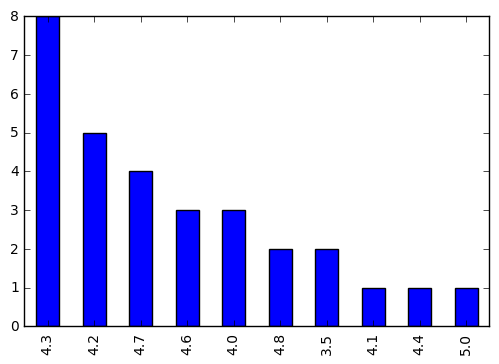

In [11]:
aggregatedBarChart('data science')

In [12]:
def barChart(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return  ds_df.Data_Science_User_Reviews.plot(kind = 'bar')
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')

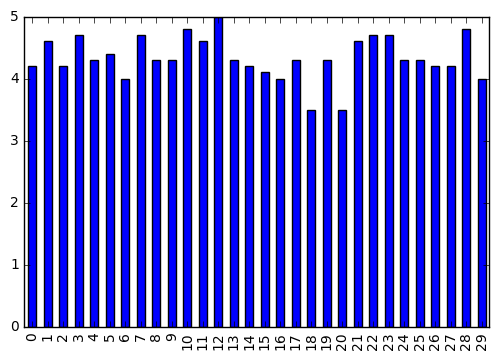

In [13]:
barChart('data science')

In [14]:
def histChart(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        return  ds_df.Data_Science_User_Reviews.plot(kind = 'hist')
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')

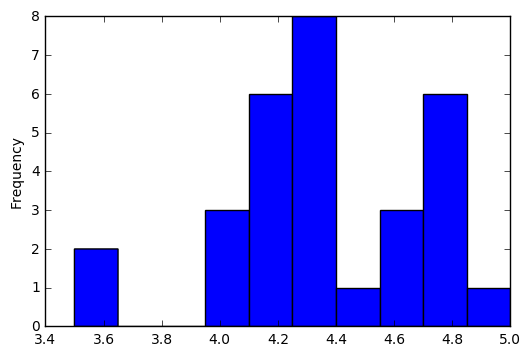

In [15]:
histChart('data science')

In [16]:
def boxChart(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_rating_tags = b1.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings = map(lambda item: item.text , ds_pg_one_rating_tags)
        ds_user_rating_strings = filter(lambda item: 'out of' in item, ds_rating_strings)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_rating_tags = b2.findAll('span', attrs={'class':'a-icon-alt'})
        ds_rating_strings_two = map(lambda item: item.text , ds_pg_two_rating_tags)
        ds_user_rating_strings_two = filter(lambda item: 'out of' in item, ds_rating_strings_two)
        rating_pattern = re.compile("\d+(\.\d)*")
        data_science_reviews_two = map(lambda item: float(re.search(rating_pattern, item).group(0)), ds_user_rating_strings_two)
        data_science_reviews_one_and_two = np.concatenate((data_science_reviews, data_science_reviews_two))
        ds_df = pd.DataFrame(data_science_reviews_one_and_two)
        ds_df.columns = ['Data_Science_User_Reviews']
        ds_df.Data_Science_User_Reviews.plot(kind = 'box')
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')

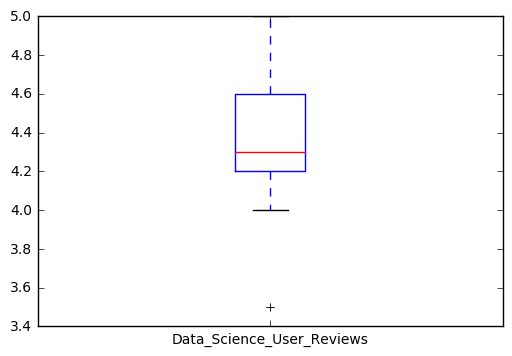

In [17]:
boxChart('data science')

In [6]:
def title(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_title_tags = b1.findAll('a', attrs={'class':'a-link-normal s-access-detail-page a-text-normal'})
        ds_title_strings = map(lambda item: item.text , ds_pg_one_title_tags)
        title_pattern = re.compile(".+")
        data_science_titles = map(lambda item: re.search(title_pattern, item).group(0), ds_title_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_title_tags = b2.findAll('a', attrs={'class':'a-link-normal s-access-detail-page a-text-normal'})
        ds_title_strings_two = map(lambda item: item.text , ds_pg_two_title_tags)
        title_pattern = re.compile(".+")
        data_science_titles_two = map(lambda item: re.search(title_pattern, item).group(0), ds_title_strings_two)
        data_science_book_titles_one_and_two = np.concatenate((data_science_titles, data_science_titles_two))
        ds_titles_df = pd.DataFrame(data_science_book_titles_one_and_two)
        ds_titles_df.columns = ['Data_Science_Book_Titles']
        return ds_titles_df
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')



In [1]:
title('')

NameError: name 'title' is not defined

In [20]:
def price(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_price_tags = b1.findAll('span', attrs={'class':'a-size-base a-color-price s-price a-text-bold'})
        ds_price_strings = map(lambda item: item.text , ds_pg_one_price_tags)
        ds_amazon_price_strings = filter(lambda item: 'out of' in item, ds_price_strings)
        price_pattern = re.compile("\d+\.\d+")
        data_science_prices = map(lambda item: float(re.search(price_pattern, item).group(0)), ds_amazon_price_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_price_tags = b2.findAll('span', attrs={'class':'a-size-base a-color-price s-price a-text-bold'})
        ds_price_strings_two = map(lambda item: item.text , ds_pg_two_price_tags)
        price_pattern = re.compile("\d+\.\d+")
        data_science_prices_two = map(lambda item: float(re.search(price_pattern, item).group(0)), ds_price_strings_two)
        data_science_prices_one_and_two = np.concatenate((data_science_prices, data_science_prices_two))
        ds_prices_df = pd.DataFrame(data_science_prices_one_and_two)
        ds_prices_df.columns = ['Data_Science_Book_Prices']
        return ds_prices_df
    elif subject == 'data analysis':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+analysis&rh=i%3Aaps%2Ck%3Adata+analysis', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data visualization' or subject == 'data viz':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+visualization',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'data management':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+management&rh=i%3Aaps%2Ck%3Adata+management',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'python':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python&rh=i%3Aaps%2Ck%3Apython',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'r':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=r+programming&rh=i%3Aaps%2Ck%3Ar+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sas':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sas+programming&rh=i%3Aaps%2Ck%3Asas+programming',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'stata':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=stata&rh=i%3Aaps%2Ck%3Astata',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'sql':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=sql&rh=i%3Aaps%2Ck%3Asql',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'web developmet' or subject == 'web dev':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=web+development&rh=i%3Aaps%2Ck%3Aweb+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    elif subject == 'virtual reality' or subject == 'gaming' or subject == 'virtual reality development':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=virtual+reality+development&rh=i%3Aaps%2Ck%3Avirtual+reality+development',headers=headers) 
        b1 = BeautifulSoup(r1.text, 'html.parser')
    else:
        print ('Sorry, please choose from the following topics: data science, data analysis, data visualization, data management, sql, python, r, sas, stata, web development, or virtual reality development.:')


In [21]:
price('data science')

,Data_Science_Book_Prices
0,37.99
1,64.04
2,22.18
3,49.14
4,39.59
5,24.99
6,53.61
7,20.00
8,40.74
9,49.54


In [43]:
def author(topic):
    subject = topic.lower()
    if subject == 'data science':
        r1 = requests.get('https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=data+science', headers=headers)
        b1 = BeautifulSoup(r1.text, 'html.parser')
        ds_pg_one_author_tags = b1.findAll('a', attrs={'class':'a-link-normal a-text-normal'})
        ds_author_strings = map(lambda item: item.text , ds_pg_one_author_tags)
        ds_author_strings = filter(lambda item: 'by' in item, ds_author_strings)
        author_pattern = re.compile("\w+")
        data_science_authors = map(lambda item: re.search(author_pattern, item).group(0), ds_author_strings)
        page = '&ie=UTF8&qid=1478029914&spIA=1783982047,1783553359'
        r2 = requests.get('https://www.amazon.com/s/ref=sr_pg_2?rh=i%3Aaps%2Ck%3Adata+science&page=2&keywords=data+science'+page,headers=headers)
        b2 = BeautifulSoup(r2.text, 'html.parser')
        ds_pg_two_author_tags = b2.findAll('a', attrs={'class':'a-link-normal a-text-normal'})
        ds_author_strings_two = map(lambda item: item.text , ds_pg_two_author_tags)
        ds_author_strings = filter(lambda item: 'by' in item, ds_author_strings)
        author_pattern = re.compile("\w+")
        data_science_author_two = map(lambda item: re.search(author_pattern, item).group(0), ds_author_strings_two)
        data_science_author_one_and_two = np.concatenate((data_science_authors, data_science_author_two))
        ds_df = pd.DataFrame(data_science_author_one_and_two)
        ds_df.columns = ['Data_Science_Authors']
        return ds_df
    else:
        print ('What the heck')

In [44]:
author('data science')

AttributeError: 'NoneType' object has no attribute 'group'